In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

# Import logic from calibrate.py/main.py
from calibrate import build_feature_row, THETA_KEYS

In [14]:
# ปรับ path ตาม project จริง
df = pd.read_csv('../../database/rawdata/test_fitness.csv')
df.head()


,HeroID,Class,Lane,Item1,Item2,Item3,Item4,Item5,Item6,CombatPower,WinRate
0,H001,Mage,Mid,I085,I075,I069,I070,I064,I078,8706,100.00
1,H001,Mage,Mid,I084,I075,I069,I070,I064,I078,7141,55.10
2,H001,Mage,Mid,I085,I075,I069,I064,I070,I078,7001,63.00
3,H001,Mage,Mid,I085,I075,I069,I064,I070,I079,6852,61.00
4,H001,Mage,Mid,I085,I069,I065,I070,I064,I078,6772,78.85


In [15]:
# ใช้ build_feature_row เพื่อสร้าง features ให้ครบแบบ calibrate.py
features_list = [build_feature_row(row) for _, row in df.iterrows()]
X = np.array([[row[k] for k in THETA_KEYS] for row in features_list])

print("X shape:", X.shape)


X shape: (669, 9)


In [16]:
# Target = WinRate (%)
y = df["WinRate"].to_numpy(float)
print("y shape:", y.shape)


y shape: (669,)


In [17]:
# ไม่ต้องเพิ่ม bias/intercept เพราะ calibrate.py ไม่ได้ใช้
w, *_ = np.linalg.lstsq(X, y, rcond=None)
print("Learned weights (OLS):")
for k, v in zip(THETA_KEYS, w):
    print(f"{k:<12}= {v:10.4f}")


Learned weights (OLS):
stat        =    12.3558
budget      =     1.5306
skill       =    -3.1525
cat         =     9.1833
cat_ATK     =    -0.0000
cat_Def     =     0.0000
cat_Magic   =    -0.1024
class       =     6.8553
lane        =    -5.4131


In [18]:
y_pred = X @ w

mse = np.mean((y - y_pred) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y - y_pred))

print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")


MSE  : 115.7026
RMSE : 10.7565
MAE  : 8.2660


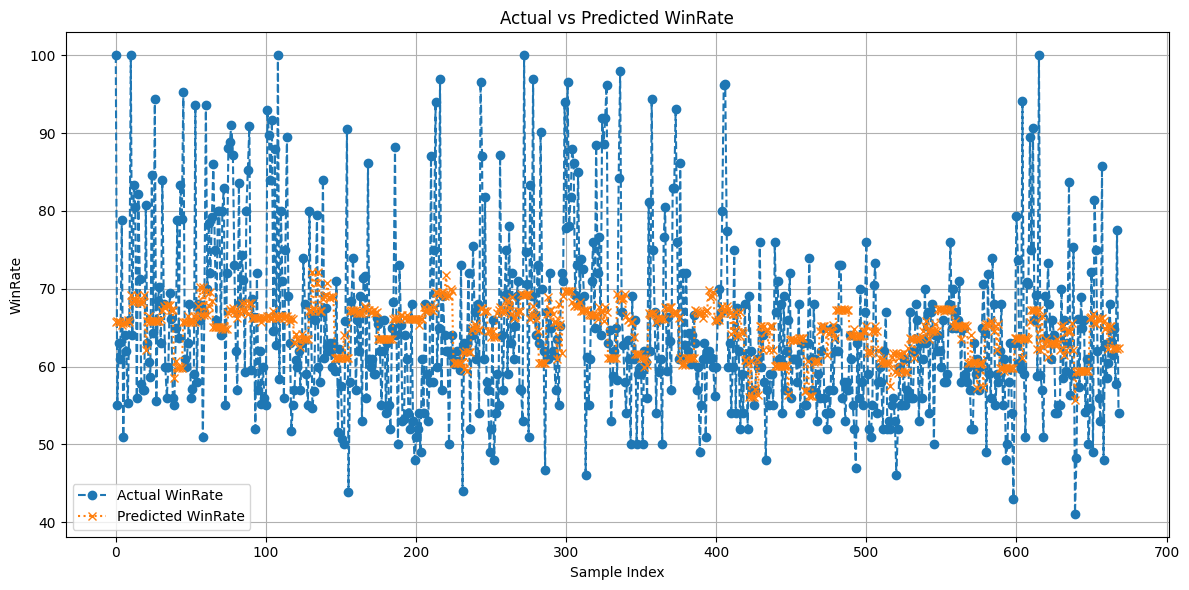

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual WinRate', marker='o', linestyle='--')
plt.plot(y_pred, label='Predicted WinRate', marker='x', linestyle=':')
plt.title('Actual vs Predicted WinRate')
plt.xlabel('Sample Index')
plt.ylabel('WinRate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


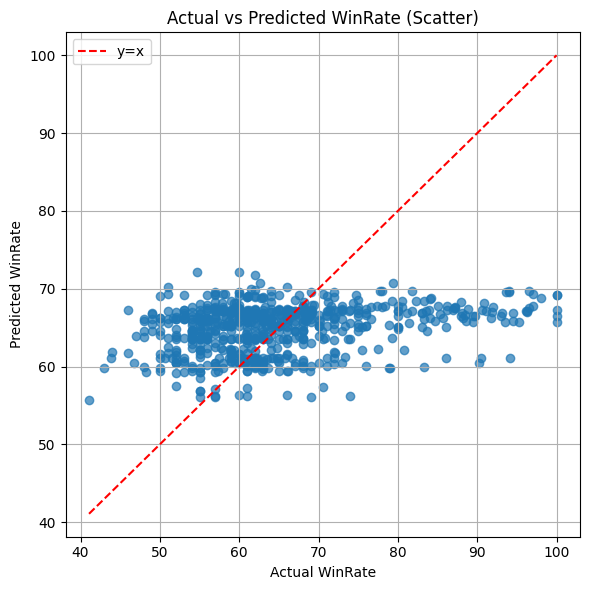

In [20]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel('Actual WinRate')
plt.ylabel('Predicted WinRate')
plt.title('Actual vs Predicted WinRate (Scatter)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='y=x')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
